In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76

import os
%matplotlib inline

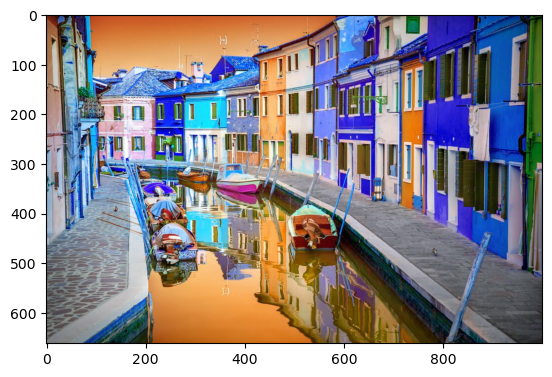

In [3]:
img=cv2.imread('colorpic.jpg')
plt.imshow(img)

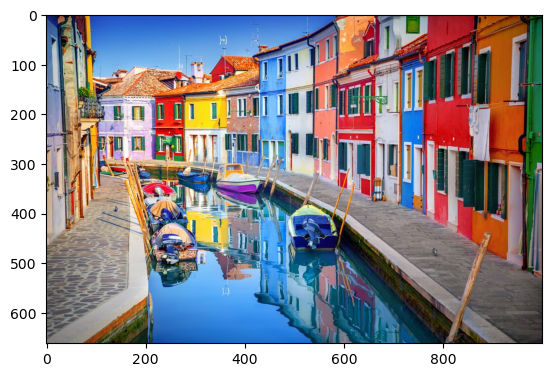

In [4]:
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [5]:
def get_image(image_link):
  image=cv2.imread(image_link)
  image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  return image

In [8]:
def get_colors(image,number_of_colours):
  modif_image=cv2.resize(image,(400,300))
  modif_image = modif_image.reshape(modif_image.shape[0]*modif_image.shape[1], 3)
  clf=KMeans(n_clusters=number_of_colours)
  labels=clf.fit_predict(modif_image)
  counts=Counter(labels)
  counts=dict(sorted(counts.items()))
  centre_colours=clf.cluster_centers_
  ordered_colours=[centre_colours[i] for i in counts.keys()]
  rgb_colours = [ordered_colours[i] for i in counts.keys()]
  return rgb_colours

In [10]:
get_colors(get_image('colorpic.jpg'), 8)

C:\Users\chiru\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[array([102.16160105, 168.09735341, 230.82801833]),
 array([104.26372412,  98.66684113,  99.40038381]),
 array([158.04707624, 146.52672095, 146.6167777 ]),
 array([208.71202532, 203.93689143, 204.81882911]),
 array([ 45.94933616, 114.98387228, 197.15875214]),
 array([29.92863716, 53.48665685, 56.27012975]),
 array([227.69029987, 158.43583829,  85.75852859]),
 array([179.24889868,  53.95693453,  29.89336169])]